# **PRINCIPAL COMPONENT ANALYSIS**-UNSUPERVISED


In [ ]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading the data
#loading the data
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/File/Riverwaterdata.csv')
data.head()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ALK_MGL,BOD_MGL,COND_USCM,DO_MGL,FESOL1_UGL,NO2_N_MGL,NH4_N_MGL,PH
0,35.0,2.0,169.0,11.7,710.23,0.008,0.04,7.5
1,17.0,2.0,90.0,11.8,552.95,0.005,0.04,7.3
2,10.0,2.0,61.0,11.9,498.58,0.005,0.04,6.9
3,15.0,2.0,78.0,11.8,456.39,0.005,0.04,7.0
4,230.0,2.0,674.0,9.6,51.89,0.056,0.25,8.1


In [ ]:
# Create a DataFrame
rwd = pd.DataFrame(data)

In [ ]:
#Data information
rwd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6221 entries, 0 to 6220
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ALK_MGL     3225 non-null   float64
 1   BOD_MGL     3004 non-null   float64
 2   COND_USCM   3179 non-null   float64
 3   DO_MGL      3145 non-null   float64
 4   FESOL1_UGL  3130 non-null   float64
 5   NO2_N_MGL   6133 non-null   float64
 6   NH4_N_MGL   6133 non-null   float64
 7   PH          3179 non-null   float64
dtypes: float64(8)
memory usage: 388.9 KB


In [ ]:
#checking null values
rwd.isnull().values.any()

True

In [ ]:
#fill null values with mean of columns in new dataframe
rwd2 = rwd.fillna(rwd.mean())
rwd2.head()

,ALK_MGL,BOD_MGL,COND_USCM,DO_MGL,FESOL1_UGL,NO2_N_MGL,NH4_N_MGL,PH
0,35.0,2.0,169.0,11.7,710.23,0.008,0.04,7.5
1,17.0,2.0,90.0,11.8,552.95,0.005,0.04,7.3
2,10.0,2.0,61.0,11.9,498.58,0.005,0.04,6.9
3,15.0,2.0,78.0,11.8,456.39,0.005,0.04,7.0
4,230.0,2.0,674.0,9.6,51.89,0.056,0.25,8.1


In [ ]:
#verifying null value
rwd2.isnull().values.any()

False

In [ ]:
#statistical information
rwd2.describe()

,ALK_MGL,BOD_MGL,COND_USCM,DO_MGL,FESOL1_UGL,NO2_N_MGL,NH4_N_MGL,PH
count,6221.000000,6221.000000,6221.000000,6221.000000,6221.000000,6221.000000,6221.000000,6221.000000
mean,95.226047,2.312150,293.552060,10.542766,307.607601,0.019734,0.100939,7.762082
std,43.664801,0.679889,118.157225,1.144070,265.840509,0.023665,0.199517,0.307554
min,7.000000,2.000000,38.000000,1.500000,36.600000,0.005000,0.000000,5.400000
25%,85.000000,2.000000,266.000000,10.542766,194.910000,0.007000,0.040000,7.762082
50%,95.226047,2.312150,293.552060,10.542766,307.607601,0.013000,0.050000,7.762082
75%,95.226047,2.312150,293.552060,10.700000,307.607601,0.023000,0.100000,7.800000
max,348.000000,14.000000,2300.000000,16.900000,8188.020000,0.446000,8.710000,10.000000


In [ ]:
# Scaling data to single unit variance
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler()
scaler.fit(rwd2)

StandardScaler()

In [ ]:
scaled_data = scaler.transform(rwd2)

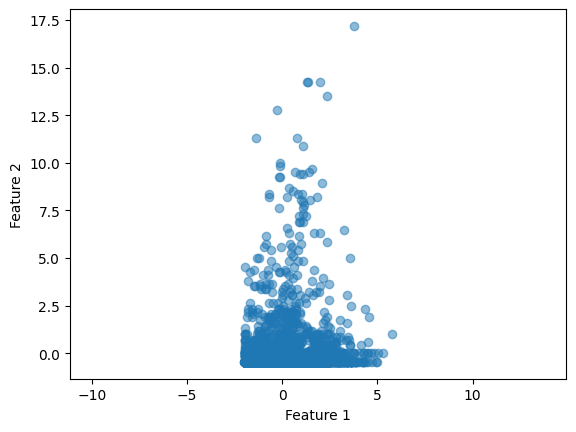

In [ ]:
#plotting the scaled data
plt.scatter(scaled_data[:,0],scaled_data[:,1],alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.axis('equal')
plt.show()

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#use the data generated above
X = scaled_data

#Instantiate PCA model
pca = PCA(n_components=2)

#Fit and transform the first two principal components
X_transformed  = pca.fit_transform(X)


In [ ]:
#original dimension
scaled_data.shape

(6221, 8)

In [ ]:
#dimesnions after transformation
X_transformed.shape

(6221, 2)

In [ ]:
X_transformed

array([[-2.5844842 ,  0.2687359 ],
       [-3.30079797,  0.42014032],
       [-4.00714329,  0.83114933],
       ...,
       [ 0.31311596,  0.81549454],
       [-0.18336285, -0.40913726],
       [ 0.0990397 ,  0.1769725 ]])

Reduced 8 dimensions to 2


Eigenvectors:
 [[ 0.5130263   0.19829446  0.52165415 -0.26312345 -0.28351317  0.27790742
   0.17839667  0.40827527]
 [-0.21840037  0.38065462 -0.11864674 -0.17256226  0.23793656  0.5317237
   0.56968475 -0.31569597]]
Eigenvalues:
 [2.87246779 1.62356485]


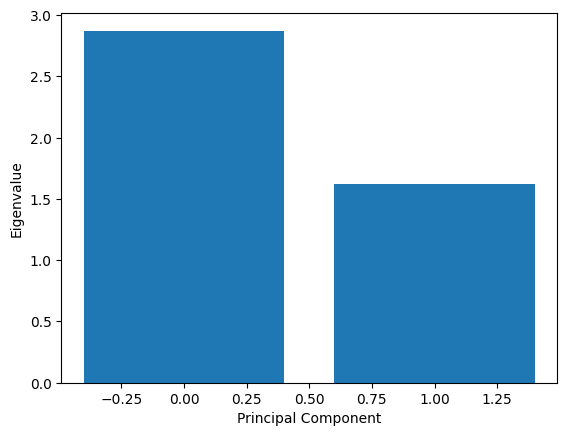

In [ ]:
#Get the eigen vectors and eigen values
eigenvectors = pca.components_
eigenvalues = pca.explained_variance_

#Print eigenvectors and eigenvalues
print("Eigenvectors:\n", eigenvectors)
print("Eigenvalues:\n", eigenvalues)

#Plot eigenvalues
plt.bar(range(len(eigenvalues)),eigenvalues)
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

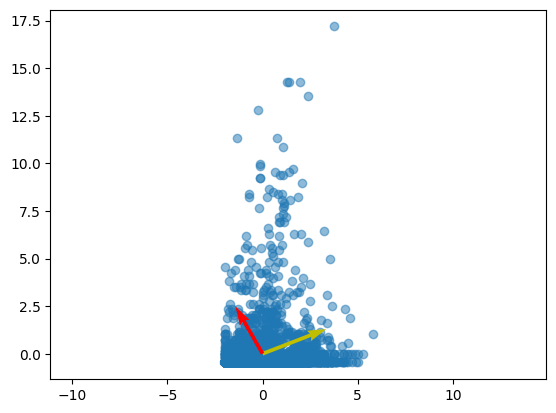

In [ ]:
#plot the data
plt.scatter(X[:,0],X[:,1],alpha=0.5)
V = pca.components_
plt.quiver([0,0],[0,0],V[:,0],V[:,1],color=['y','r'],scale=4)
plt.axis('equal')
plt.show()

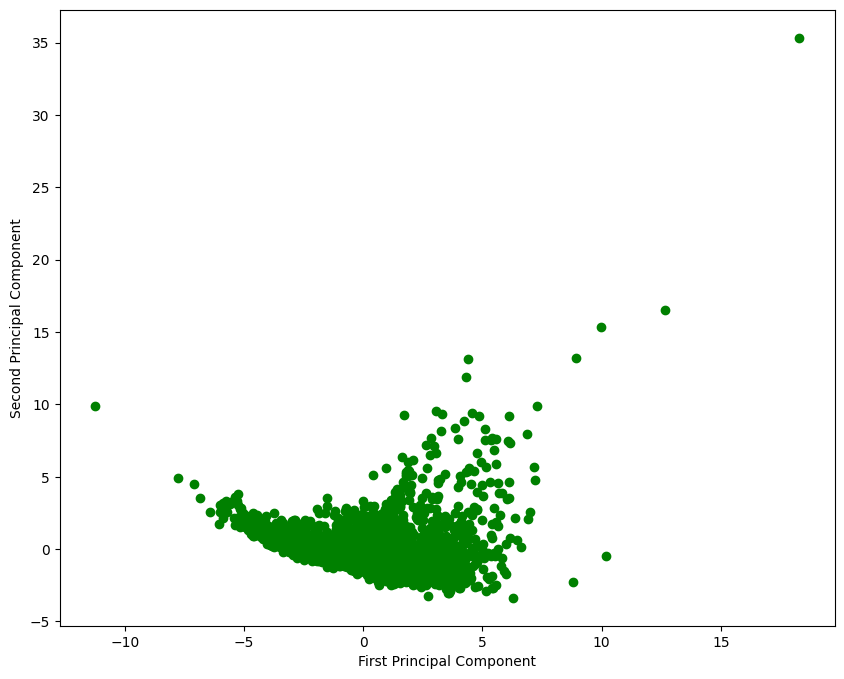

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(X_transformed[:,0],X_transformed[:,1] , color ='green')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

# **DECISION TREE**-SUPERVISED

In [ ]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Exploratory data analysis
rwd2.shape

(6221, 8)

In [ ]:
rwd2.isnull().values.any()

False

In [ ]:
rwd2.head()

,ALK_MGL,BOD_MGL,COND_USCM,DO_MGL,FESOL1_UGL,NO2_N_MGL,NH4_N_MGL,PH
0,35.0,2.0,169.0,11.7,710.23,0.008,0.04,7.5
1,17.0,2.0,90.0,11.8,552.95,0.005,0.04,7.3
2,10.0,2.0,61.0,11.9,498.58,0.005,0.04,6.9
3,15.0,2.0,78.0,11.8,456.39,0.005,0.04,7.0
4,230.0,2.0,674.0,9.6,51.89,0.056,0.25,8.1


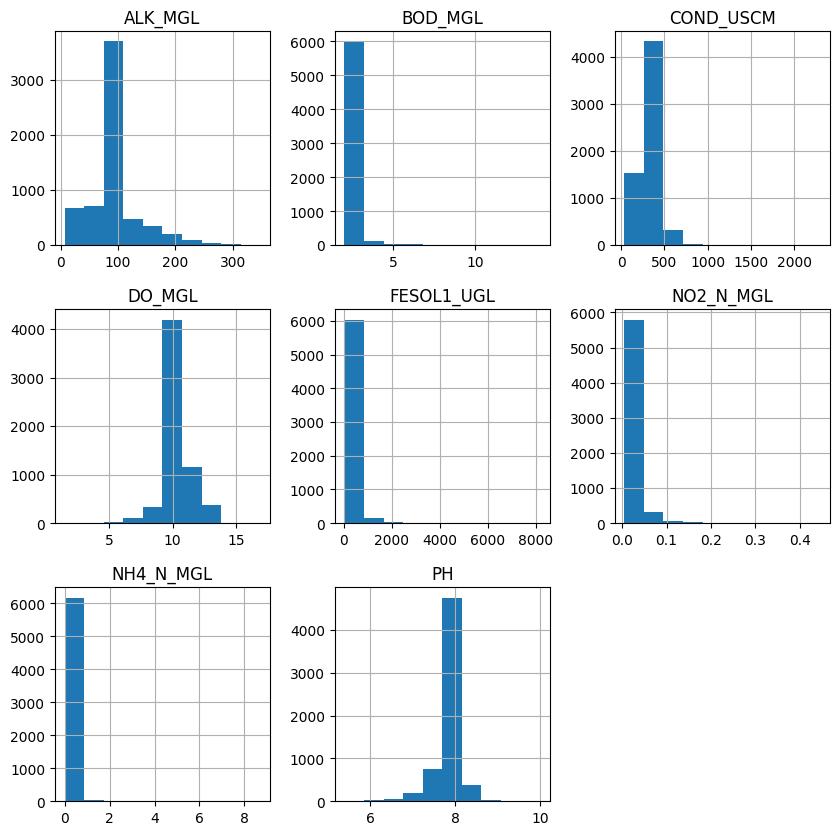

In [ ]:
rwd2.hist(figsize=(10,10))
plt.show()

In [ ]:
#Creating new column "Potability" which is going to be the target varaible which will be used for the decision tree and knn models
# ph of water between 6.5 and 9.5 is considered potable

def condition(x):
  if x >9.5:
    return "0"
  elif x>=6.5 and x<=9.5:
    return "1"
  else:
    return '0'

rwd2['Potability'] = rwd2['PH'].apply(condition)

rwd2.head()
#1 = potable , 0 = not potable

,ALK_MGL,BOD_MGL,COND_USCM,DO_MGL,FESOL1_UGL,NO2_N_MGL,NH4_N_MGL,PH,Potability
0,35.0,2.0,169.0,11.7,710.23,0.008,0.04,7.5,1
1,17.0,2.0,90.0,11.8,552.95,0.005,0.04,7.3,1
2,10.0,2.0,61.0,11.9,498.58,0.005,0.04,6.9,1
3,15.0,2.0,78.0,11.8,456.39,0.005,0.04,7.0,1
4,230.0,2.0,674.0,9.6,51.89,0.056,0.25,8.1,1


DECISION TREE MODEL BUILDING

In [ ]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [ ]:
#splitting the dataset
x = rwd2.drop('Potability', axis = 1)
y = rwd2['Potability']


In [ ]:
#checking for imbalance in data
rwd2['Potability'].value_counts()

1    6177
0      44
Name: Potability, dtype: int64

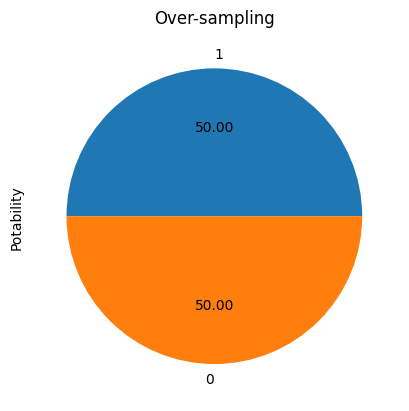

In [ ]:
#Random oversampling
from imblearn.over_sampling import RandomOverSampler
#ros = RandomOverSampler(sampling_strategy=1)
ros = RandomOverSampler(sampling_strategy="not majority")
x_res, y_res = ros.fit_resample(x, y)
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [ ]:
#verifying the oversampling
y_res.value_counts()

1    6177
0    6177
Name: Potability, dtype: int64

In [ ]:
#split the dataset into training and testing sets
x_train, x_test,y_train,y_test = train_test_split(x_res,y_res, test_size =0.2 , random_state=30)

In [ ]:
#creating and training the Decision Tree Clasifier
dt = DecisionTreeClassifier(criterion='gini',max_depth=None,random_state=30)
dt.fit(x_res ,y_res)

DecisionTreeClassifier(random_state=30)

In [ ]:
#predicting the response for test dataset
y_pred = dt.predict(x_test)

In [ ]:
#Model accuracy
accuracy = accuracy_score(y_test,y_pred)
print ('Accuracy:{0}'.format(accuracy))


Accuracy:1.0


In [ ]:

#VISUALIZATION DECISION TREE

from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
import graphviz
from six import StringIO

#DOT file
dot_data = export_graphviz(dt,
out_file=None,feature_names=None,filled=True)



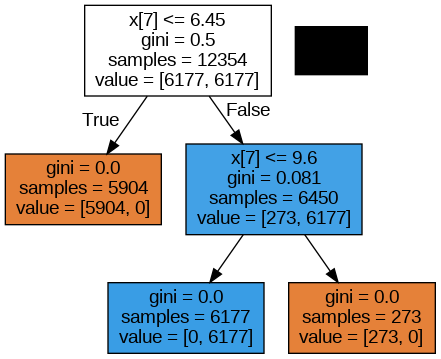

In [ ]:
#PyDotplus - provides interface to Graphviz's Dot language
import pydotplus
from IPython.display import Image
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

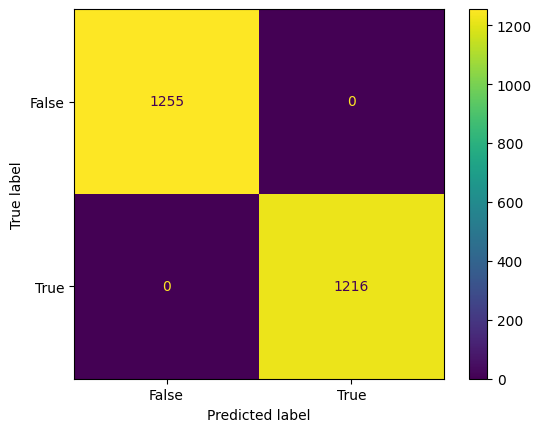

In [ ]:
#CONFUSION MATRIX
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test , y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score ,recall_score ,precision_score
#compute confusion matrix, accuracy,recall and precision
conf_mat =confusion_matrix(y_test , y_pred)
accuracy = accuracy_score(y_test, y_pred)

print ('Confusion matrix:{0}'.format(conf_mat))
print ('Accuracy:{0}'.format(accuracy))


Confusion matrix:[[1255    0]
 [   0 1216]]
Accuracy:1.0


In [ ]:
#classification report
from sklearn.metrics import classification_report
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1255
           1       1.00      1.00      1.00      1216

    accuracy                           1.00      2471
   macro avg       1.00      1.00      1.00      2471
weighted avg       1.00      1.00      1.00      2471



# **K NEIGHBORS CLASSIFIER**-SUPERVISED

In [ ]:
#importing libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:
#splitting the dataset
x = rwd2.drop('Potability', axis = 1)
y = rwd2['Potability']


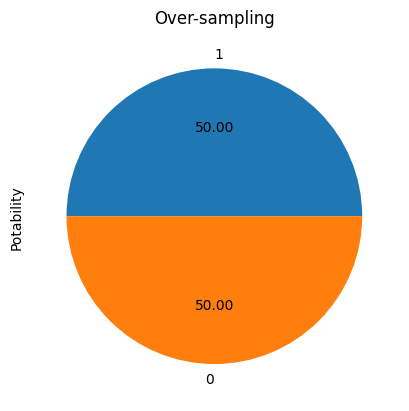

In [ ]:
#Random oversampling
from imblearn.over_sampling import RandomOverSampler
#ros = RandomOverSampler(sampling_strategy=1)
ros = RandomOverSampler(sampling_strategy="not majority")
X_res, y_res = ros.fit_resample(x, y)
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [ ]:
#verifying the oversampling
y_res.value_counts()

1    6177
0    6177
Name: Potability, dtype: int64

In [ ]:
#Splitting the dataset into training set and test set
x_train, x_test,y_train,y_test = train_test_split(x_res,y_res, test_size =0.2 , random_state=30)

In [ ]:
#model building
knn = KNeighborsClassifier(n_neighbors=1)
knn_model = knn.fit(x_train, y_train)

In [ ]:
knn_pred = knn_model.predict(x_test)

In [ ]:
#accuracy of model
accuracy = accuracy_score(y_test,knn_pred)
print ('Accuracy:{0}'.format(accuracy))


Accuracy:0.9963577498988264


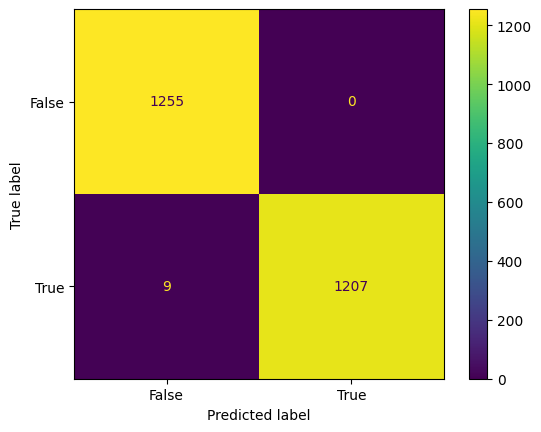

In [ ]:
#CONFUSION MATRIX

confusion_matrix = metrics.confusion_matrix(y_test , knn_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score ,recall_score ,precision_score
#compute confusion matrix, accuracy,recall and precision
conf_mat =confusion_matrix(y_test , knn_pred)
accuracy = accuracy_score(y_test, knn_pred)

print ('Confusion matrix:{0}'.format(conf_mat))
print ('Accuracy:{0}'.format(accuracy))

Confusion matrix:[[1255    0]
 [   9 1207]]
Accuracy:0.9963577498988264


In [ ]:
from sklearn.metrics import classification_report
print (classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1255
           1       1.00      0.99      1.00      1216

    accuracy                           1.00      2471
   macro avg       1.00      1.00      1.00      2471
weighted avg       1.00      1.00      1.00      2471



ROC CURVE

In [ ]:

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [ ]:
#making predictions on the testing data
y_score1 = dt.predict_proba(x_test)[:,1]
y_score2 = knn.predict_proba(x_test)[:,1]

In [ ]:
y_score2
print(y_score2.dtype)

float64


In [ ]:
#calculate the ROC curve and AUC for each classifier
fpr_dt , tpr_dt,_ = roc_curve(y_test.astype(int),y_score1.astype(int) )
auc_dt = roc_auc_score(y_test,y_score1)

fpr_knn , tpr_knn,_ = roc_curve(y_test.astype(int),y_score2.astype(int) )
auc_knn = roc_auc_score(y_test,y_score2)

#y_test and y_score1 should be integers for the roc and auc to be calculated

In [ ]:
print("AUC for Decision tree:{0}".format(auc_dt))
print("AUC for KNN:{0}".format(auc_knn))

AUC for Decision tree:1.0
AUC for KNN:0.9962993421052632


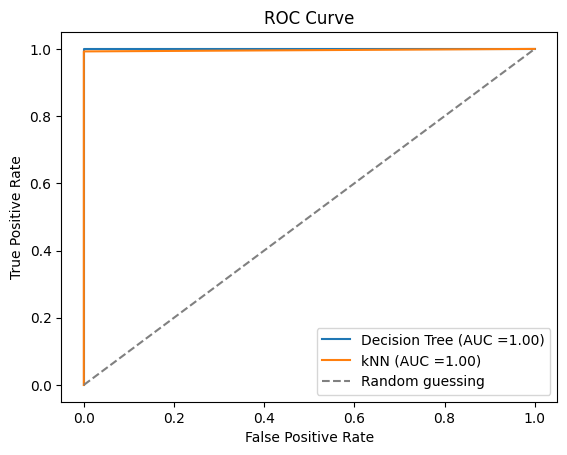

In [ ]:
#Plotting the ROC curves for each calssifier
plt.plot(fpr_dt,tpr_dt, label = f"Decision Tree (AUC ={auc_dt:.2f})")
plt.plot(fpr_knn,tpr_knn, label = f"kNN (AUC ={auc_knn:.2f})")

#adding labels and legends
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.plot([0,1],[0,1], linestyle='--',color ='gray', label = 'Random guessing')
plt.legend()

plt.show()